In [20]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [21]:
os.chdir(r'D:\tamuk\Previous Sem\Summer courses\Data mining\Exam\archive')
# Load the Iris dataset
data = pd.read_csv("diabetes.csv")
print('shape',data.shape)

shape (768, 9)


In [22]:
data.head(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [23]:
data.isnull().sum().sum()

0

In [24]:
data['BloodPressure'].replace(to_replace = 0, value = round(data['BloodPressure'].mean()), inplace=True)

data['BloodPressure']=round(data['BloodPressure'])

In [25]:
data['SkinThickness'].replace(to_replace = 0, value = round(data['SkinThickness'].mean()), inplace=True)

data['SkinThickness']=round(data['SkinThickness'])

In [26]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,21,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,21,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,21,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,21,0,0.0,0.232,54,1


In [27]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

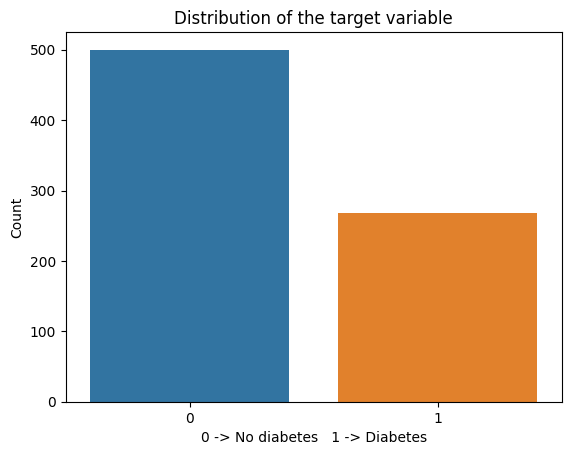

In [28]:
sns.countplot(x='Outcome', data=data)

# Adding a label to the x-axis
plt.xlabel('0 -> No diabetes   1 -> Diabetes')

# Adding a label to the y-axis
plt.ylabel('Count')

# Setting the title of the plot
plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

# Box Plot
import seaborn as sns
sns.boxplot(data['BloodPressure'])


# Box Plot
import seaborn as sns
sns.boxplot(data['Insulin'])


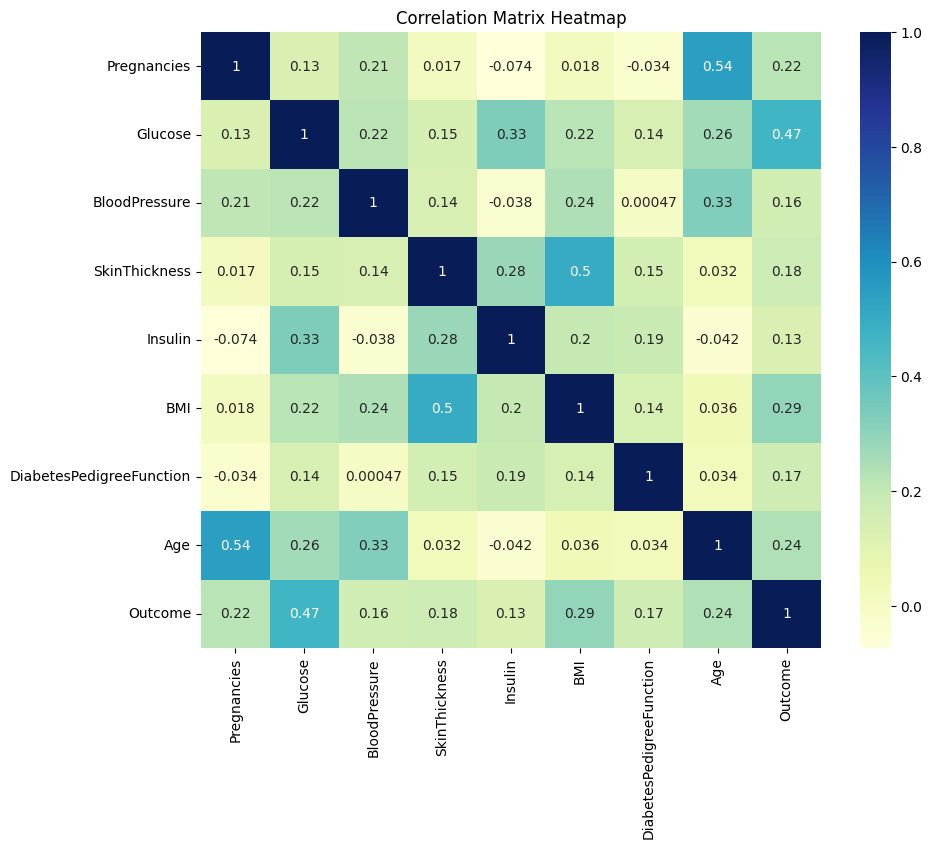

<Figure size 640x480 with 0 Axes>

In [29]:
corr_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.savefig('heatmap.png', bbox_inches='tight')


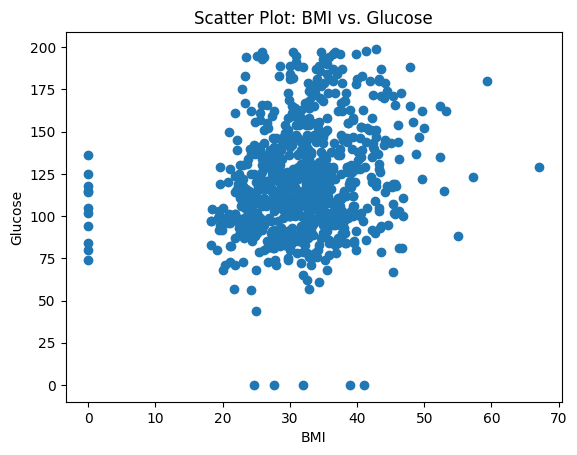

<Figure size 640x480 with 0 Axes>

In [30]:
# Creating a scatter plot to visualize the relationship between 'BMI' and 'Glucose'
plt.scatter(data['BMI'], data['Glucose'])

# Adding a label to the x-axis
plt.xlabel('BMI')

# Adding a label to the y-axis
plt.ylabel('Glucose')

# Adding a title to the plot
plt.title('Scatter Plot: BMI vs. Glucose')

# Display the scatter plot
plt.show()
plt.savefig('scatter.png',  bbox_inches="tight",
            )


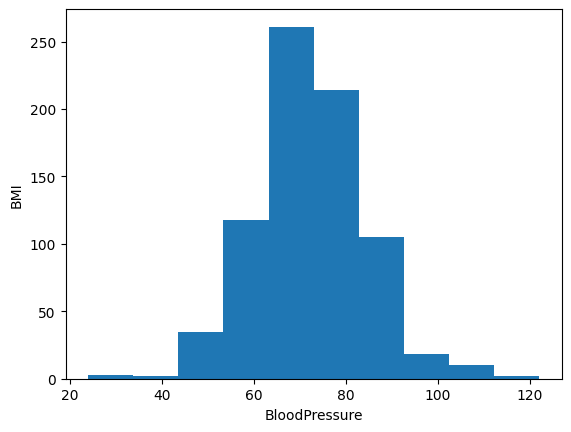

In [31]:
# Creating a histogram to visualize the distribution of the 'Age' variable
plt.hist(data['BloodPressure'])

# Adding a label to the x-axis
plt.xlabel('BloodPressure')

# Adding a label to the y-axis
plt.ylabel('BMI')

# Display the histogram plot
plt.show()

D:\all\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


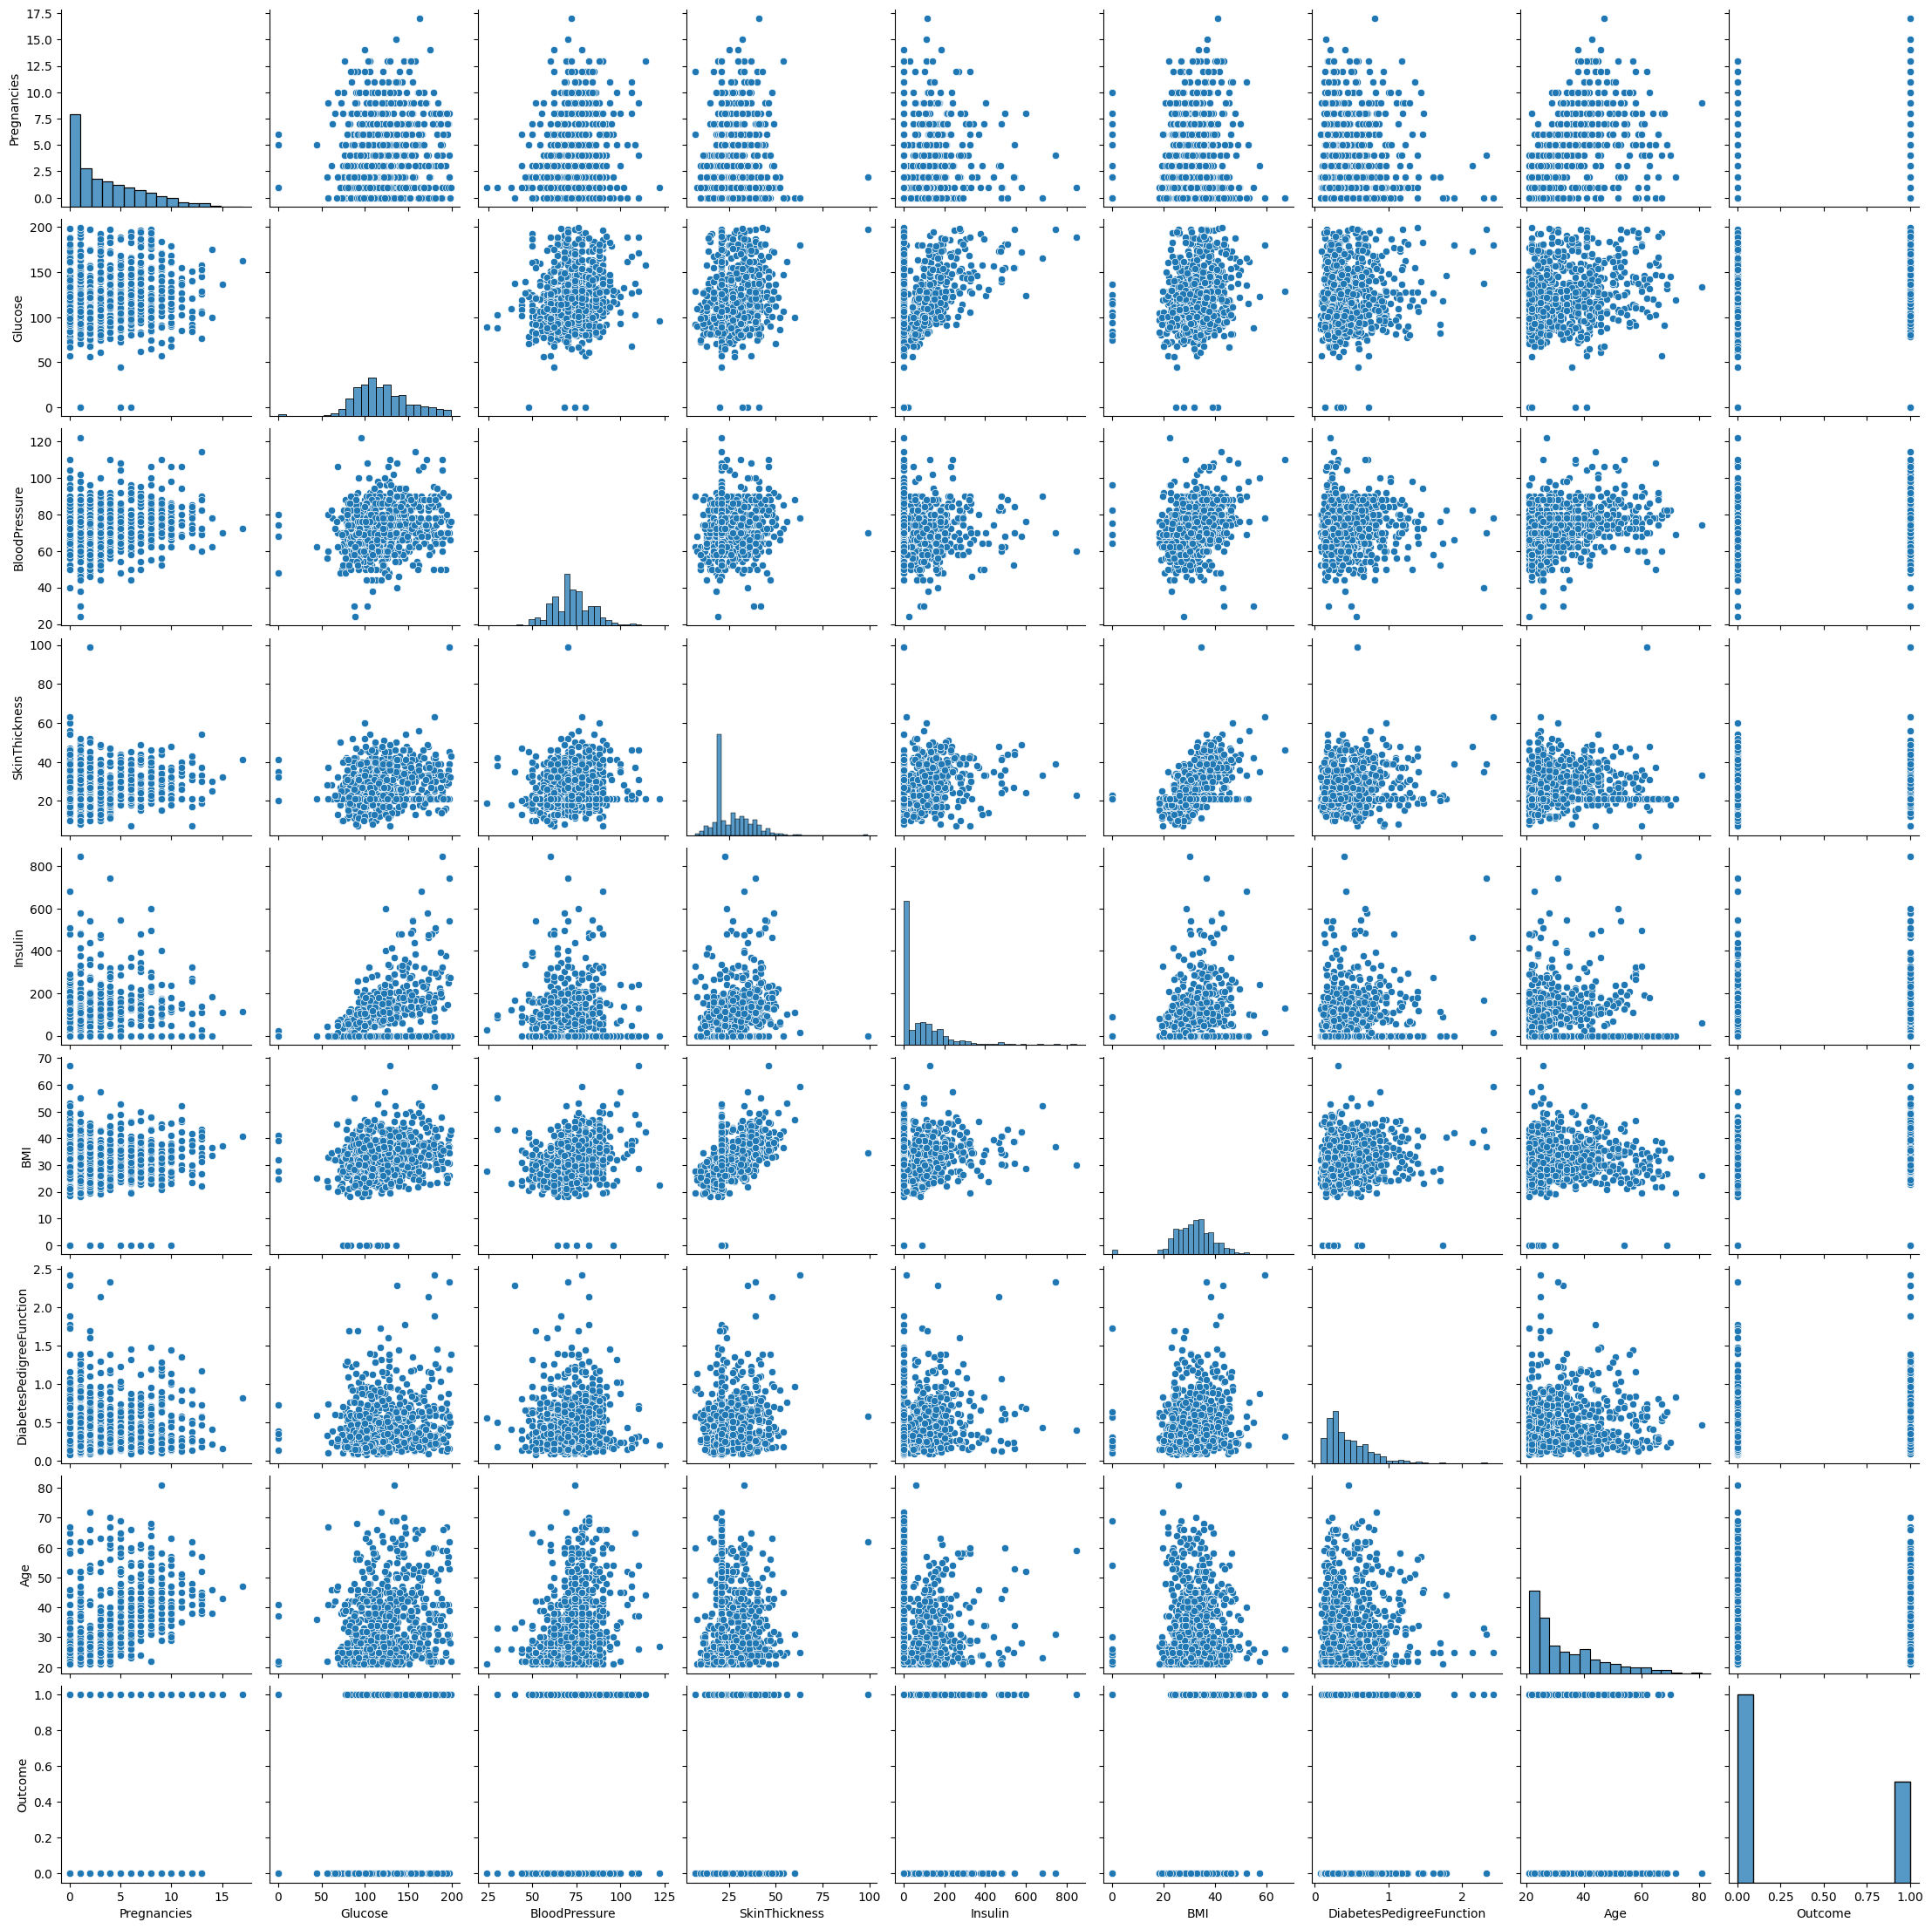

In [32]:
sns.pairplot(data)

In [33]:
# Split the data into features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
data.shape

(1000, 9)

In [35]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)



In [36]:

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=False, random_state=78)

In [37]:
# -------------------------
clf_nb = GaussianNB(var_smoothing=0.081)
# train naive bayes
clf_nb.fit(X_train, y_train)
# Predict the test set results
y_pred_nb= clf_nb.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy for Naive bayes: {}%'.format(accuracy_nb*100 ))

Accuracy for Naive bayes: 56.99999999999999%


In [38]:
# -------------------------------------

clf_dtree=DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=1, min_samples_split= 2,
                       random_state=43)
clf_dtree.fit(X_train, y_train)
y_pred_dtree = clf_dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print('Accuracy for Decision tree: {}%'.format(accuracy_dtree*100 ))

Accuracy for Decision tree: 77.5%


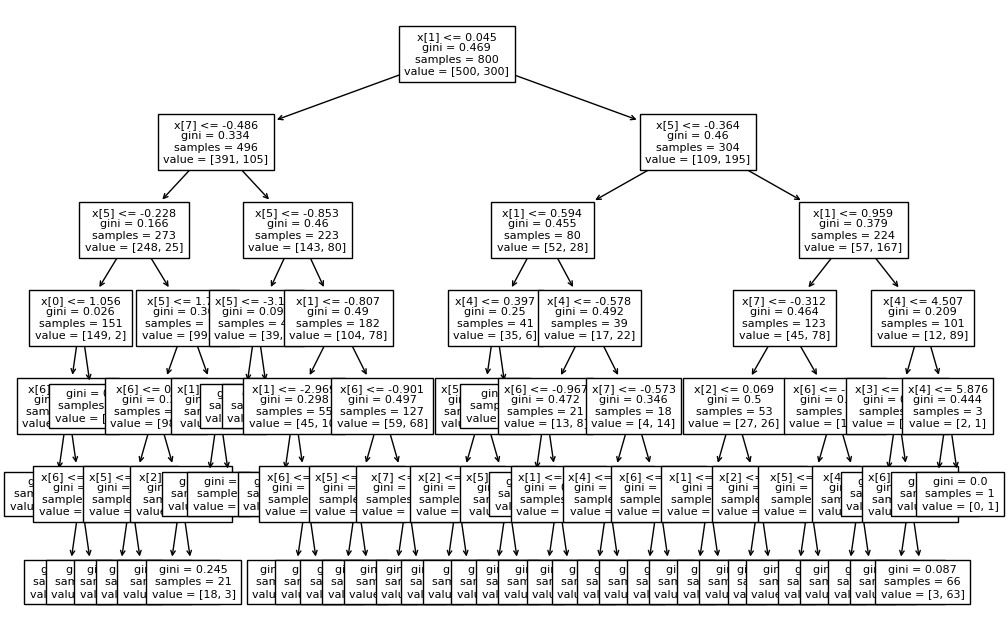

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_dtree.fit(X_train, y_train), fontsize=8)
plt.savefig('tree.png',format='eps',bbox_inches = "tight")


In [40]:
# Create the SVM classifier

clf_svc = SVC(C= 100, gamma= 1, kernel= 'linear')
# Train the SVM classifier
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svc)
print('Accuracy of svm: {}%'.format(accuracy*100))

Accuracy of svm: 59.0%


In [41]:
from sklearn.metrics import f1_score
log1 =LogisticRegression(solver='lbfgs',C=1,penalty='l2') #3.6011768069240193
log1.fit(X_train,y_train) 
y_pred_log = log1.predict(X_test)
log_accuracy =accuracy_score(y_test,y_pred_log) 
print('Accuracy of logistic regression: {}%'.format(log_accuracy*100))

Accuracy of logistic regression: 62.0%


In [42]:
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123,n_estimators= 25,
 min_samples_split= 3,
 min_samples_leaf= 1,
 criterion= 'entropy')
#learning
model.fit(X_train,y_train)
#Prediction

prediction=model.predict(X_test)
rando_acc =accuracy_score(y_test,prediction) 
print('Accuracy of Random Forest accuracy: {}%'.format(rando_acc*100))

Accuracy of Random Forest accuracy: 86.0%


In [43]:
xgboost = xgb.XGBClassifier(subsample= 0.9, reg_lambda= 1.0, n_estimators=19, min_child_weight= 0.5, max_depth=10, 
                            learning_rate=0.2, gamma= 1.0, colsample_bytree= 0.8, colsample_bylevel= 0.7)
xgboost.fit(X_train,y_train) 

y_pred_xgboost = xgboost.predict(X_test)
xgboost_acc =accuracy_score(y_test,y_pred_xgboost) 
print('Accuracy of xgboost accuracy: {}%'.format(xgboost_acc*100))

Accuracy of xgboost accuracy: 88.0%


In [44]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
knn_acc=accuracy_score(y_test,pred)
print('Accuracy of KNN clustering: {}%'.format(knn_acc*100))

Accuracy of KNN clustering: 78.5%


In [45]:
# Hyper parameter tuning

In [46]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0657933224657568)


In [47]:
dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[i for i in range(1,30)],
          'min_samples_leaf':[i for i in range(1,30)],
          'min_samples_split':[i for i in range(2,32,2)],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')
GS.fit(X_train, y_train)
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)
print('Estimator',GS.best_estimator_)

Fitting 5 folds for each of 25230 candidates, totalling 126150 fits


KeyboardInterrupt: 

In [ ]:
log =LogisticRegression(solver='lbfgs')
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0.001, 5, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(log, hyperparameters, cv=6, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)  # 

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:

clf = xgb.XGBClassifier()
param_grid = {
        
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [i  for i in range(1,50)]}

xgboo = GridSearchCV(clf, param_grid, n_iter=10,
                            n_jobs=-1, verbose=1, cv=4, random_state=42)
xgboo.fit(X_train,y_train)
print(xgboo.best_params_)
print(xgboo.best_estimator_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()


model.fit(X_train,y_train)

param_rando = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'n_jobs':[-1]}
random = RandomizedSearchCV(estimator = model, param_distributions = param_rando, n_iter = 10, cv = 6, verbose=0, random_state=42)
random.fit(X_train,y_train) 
#print('features', model.best_estimator_.get_params())
print(random.best_params_)
print(random.best_estimator_)

In [ ]:

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf','linear','poly'] }

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
